# Introduction
This article introduces the Arabic Handwritten Alphabetsand Words, Dataset (AHAWP). AHAWP is a comprehensive dataset comprising various Arabic alphabets and words. It serves as a valuable resource for tasks such as optical handwriting recognition of Arabic script. The dataset was meticulously compiled, encompassing different variations of Arabic alphabetsand words .

# Dataset Overview
### AHAWP includes:

#### Arabic Alphabets:
The dataset covers a wide range of Arabic alphabets, including variations such as beginning, end, middle, and regular forms.
#### Arabic Words:
It contains a diverse set of Arabic words, carefully selected to represent all Arabic alphabets comprehensively.


# Preprocessing of Alphabet Images
Next, I will proceed with preprocessing the data in the alphabet folder. This involves performing various transformations and enhancements on the images to prepare them for further analysis and modeling.


#### The script preprocesses a dataset of handwritten Arabic alphabets by extracting individual letters from each user's folder. It iterates over each folder, reads the images, and divides them into groups of 10 letters per page, repeated 10 times. These letters are then saved into corresponding folders based on their alphabet type within an output directory. Overall, the script organizes the dataset into preprocessed alphabet images categorized by their specific alphabet type.

In [14]:
import cv2
import os
from os import path

In [73]:
def getLetterName(page, column):
    if (page==1):
        if (column==0): return "beh_middle"
        if (column==1): return "beh_begin"
        if (column==2): return "beh_regular"
        if (column==3): return "alif_end"
        if (column==4): return "alif_regular"
    if (page==2):    
        if (column==0): return "jeem_end"
        if (column==1): return "jeem_middle"
        if (column==2): return "jeem_begin"
        if (column==3): return "jeem_regular"
        if (column==4): return "beh_end"
    if (page==3):    
        if (column==0): return "seen_regular"
        if (column==1): return "raa_end"
        if (column==2): return "raa_regular"
        if (column==3): return "dal_end"
        if (column==4): return "dal_regular"
    if (page==4):    
        if (column==0): return "sad_begin"
        if (column==1): return "sad_regular"
        if (column==2): return "seen_end"
        if (column==3): return "seen_middle"
        if (column==4): return "seen_begin"
    if (page==5):    
        if (column==0): return "tah_end"
        if (column==1): return "tah_middle"
        if (column==2): return "tah_regular"
        if (column==3): return "sad_end"
        if (column==4): return "sad_middle"
    if (page==6):    
        if (column==0): return "feh_regular"
        if (column==1): return "ain_end"
        if (column==2): return "ain_middle"
        if (column==3): return "ain_begin"
        if (column==4): return "ain_regular"
    if (page==7):    
        if (column==0): return "qaf_begin"
        if (column==1): return "qaf_regular"
        if (column==2): return "feh_end"
        if (column==3): return "feh_middle"
        if (column==4): return "feh_begin"
    if (page==8):    
        if (column==0): return "kaf_middle"
        if (column==1): return "kaf_begin"
        if (column==2): return "kaf_regular"
        if (column==3): return "qaf_end"
        if (column==4): return "qaf_middle"
    if (page==9):    
        if (column==0): return "lam_end"
        if (column==1): return "lam_middle"
        if (column==2): return "lam_begin"
        if (column==3): return "lam_regular"
        if (column==4): return "kaf_end"
    if (page==10):    
        if (column==0): return "noon_regular"
        if (column==1): return "meem_end"
        if (column==2): return "meem_middle"
        if (column==3): return "meem_begin"
        if (column==4): return "meem_regular"
    if (page==11):    
        if (column==0): return "heh_begin"
        if (column==1): return "heh_regular"
        if (column==2): return "noon_end"
        if (column==3): return "noon_middle"
        if (column==4): return "noon_begin"
    if (page==12):    
        if (column==0): return "yaa_regular"
        if (column==1): return "waw_end"
        if (column==2): return "waw_regular"
        if (column==3): return "heh_end"
        if (column==4): return "heh_middle"
    if (page==13):    
        if (column==0): return "lam_alif"
        if (column==1): return "alif_hamza"
        if (column==2): return "yaa_end"
        if (column==3): return "yaa_middle"
        if (column==4): return "yaa_begin"


In [75]:
input_dir_name_1 = os.path.abspath(r"C:\Users\Rawan\Desktop\term 8\deep learning\raw_dataset")
output_dir_name = path.join(r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\alphabets")

# preprocessing for both alphabets and words

## Dividing the Dataset:
#### The raw dataset is divided into folders, where each folder represents either a word or an alphabet.
## Cropping the Images:
#### The images are cropped to remove any unnecessary borders or whitespace surrounding the main content.
## Grayscale Conversion:
#### The images are converted from color to grayscale to simplify processing and reduce computational complexity.
## Thresholding:
#### A thresholding technique is applied to enhance the contrast between the foreground (text) and background. This helps to create a binary image where the text appears white and the background appears black.

In [76]:


# For each user process the images containig the letters
for userid in range(1,83):
    username="user" + format(userid,'03d')
    print(username)   
    
    input_dirName = os.path.join(input_dir_name_1, username, "letters")
    #width = 390
    #x_increment = 20
    height = 216
    # user 33 wrote on line (not within box)
#    if (userid == 33): height = 225
        
    y_increrment = 20
    page = 0
    # Process all the user files
    for file in os.listdir(input_dirName):
        #print(file)
        image=cv2.imread(os.path.join(input_dirName, file))
        page = page + 1
        #if (page == 2): break
        index = 0
        start_x = 215
        end_x = 605
        # Process each column
        for column in range(5):
            start_y = 680
            # Due to character size, some pages have higher initial height
            if (page == 7 or page == 9): start_y = 695
            #print("(%d,%d,%d,%d)"%(start_x, start_y, end_x, start_y+height))
            letter_name = getLetterName(page, column)

            output_dir = os.path.join(output_dir_name, letter_name)
            if (not os.path.exists(output_dir)):
                os.makedirs(output_dir)
            
            # Process each row within a column
            for row in range(10):
                #print("(%d,%d,%d,%d)"%(start_x, start_y, end_x, start_y+height))
                cropped_image = image[start_y:start_y+height, start_x:end_x]
                index = index + 1
                filename = "%s_%s_%s.png"%(username, letter_name, format(index,'03d'))               
                #cv2.imshow("cropped", cropped_image)
                cv2.imwrite(os.path.join(output_dir, filename), cropped_image)
                start_y = start_y + height + y_increrment
            # Columns have different widths :(
            if (column == 0): start_x= 625; end_x = 1005
            if (column == 1): start_x= 1030; end_x = 1455
            if (column == 2): start_x= 1490; end_x = 1890
            if (column == 3): start_x= 1915; end_x = 2330


user001
user002
user003
user004
user005
user006
user007
user008
user009
user010
user011
user012
user013
user014
user015
user016
user017
user018
user019
user020
user021
user022
user023
user024
user025
user026
user027
user028
user029
user030
user031
user032
user033
user034
user035
user036
user037
user038
user039
user040
user041
user042
user043
user044
user045
user046
user047
user048
user049
user050
user051
user052
user053
user054
user055
user056
user057
user058
user059
user060
user061
user062
user063
user064
user065
user066
user067
user068
user069
user070
user071
user072
user073
user074
user075
user076
user077
user078
user079
user080
user081
user082


## Alphabets Before Grayscale Thresholding

This cell contains code to plot the alphabets before applying grayscale thresholding. The purpose of this visualization is to show the original appearance of the alphabets in the dataset.

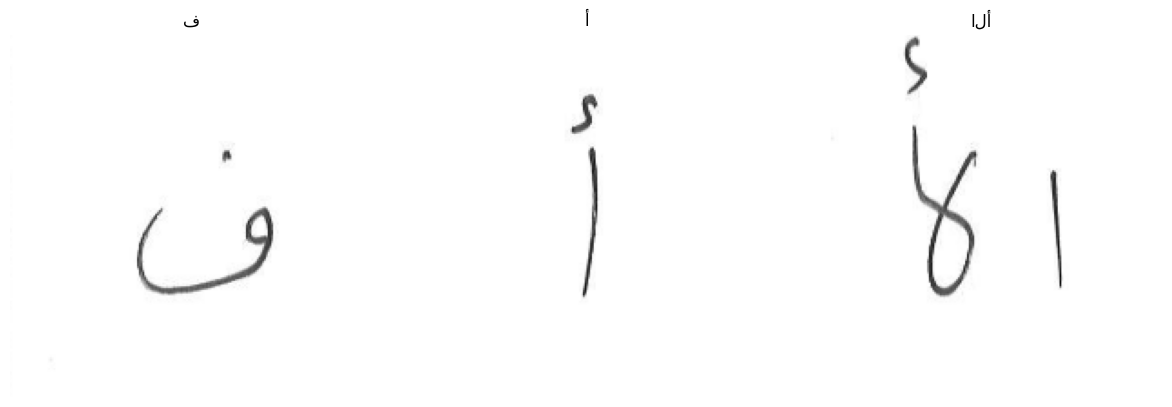

In [88]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Paths to the directories containing the images and text files
images_folder = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\alphabetss"
labels_folder = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\alphabet_labels"

# Function to read an image and its corresponding label
def read_image_and_label(folder_path, label_file):
    # Read image
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])  # Assuming each folder contains only one image
    image = cv2.imread(image_path)
    
    # Resize image to a smaller size
    image = cv2.resize(image, (200, 200))  # Adjust the size as needed
    
    # Read label from text file
    label_path = os.path.join(labels_folder, label_file)
    with open(label_path, 'r', encoding='utf-8') as file:
        label = file.read().strip()
    
    return image, label

# Create a figure for the grid of images
plt.figure(figsize=(12, 4))

# Select three random folders
random_folders = random.sample(os.listdir(images_folder), 3)

# Iterate over the random folders and plot images
for i, folder_name in enumerate(random_folders):
    # Read image and label
    image_folder = os.path.join(images_folder, folder_name)
    label_file = folder_name + '.txt'
    image, label = read_image_and_label(image_folder, label_file)
    
    # Plot image
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
    plt.title(label)
    plt.axis('off')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the grid of images
plt.show()


# This script is used to pre-process the alphabets 

In [18]:

# (remove surrounding whitespace, resize (with aspect ratio), grayscale)
import cv2
import os
from os import path
from PIL import Image
from PIL import ImageOps

In [19]:
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

In [20]:


input_dir_name = path.join(r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\alphabets")

        

In [21]:
for alphabet_folder in os.listdir(input_dir_name):
    print(alphabet_folder)
    alphabet_dir = os.path.join(input_dir_name, alphabet_folder)
    # for every file in alphabet directory, crop from center and remove border
    for image_file in os.listdir(alphabet_dir):
        image_path = os.path.join(alphabet_dir, image_file)
        image = Image.open(image_path)
        image.load()
        imageSize = image.size
        # Crop center piece of the image containing the letter 
        # eliminating 5 pixels on sides to remove border lines
        #image = crop_center(image, 300, 180)
        image = crop_center(image, imageSize[0]-20, imageSize[1]-20)
        
        # Remove any whitespace surrounding the image      
        # remove alpha channel
        invert_im = image.convert("RGB") 
        
        # invert image (so that white is 0)
        invert_im = ImageOps.invert(invert_im)

        imageBox = invert_im.getbbox()
        
        cropped = image.crop(imageBox)
        
        # only save cropped image if it is not less than 64x64
        # otherwise keep original image
        cropped_width, cropped_height = cropped.size
        if cropped_width > 64 and cropped_height > 64:
            cropped.save(image_path)
        else:
            image.save(image_path)
        
    # for every image in the alphabet folder, resize and convert to grayscale
    for image_file in os.listdir(alphabet_dir):
        image_path = os.path.join(alphabet_dir, image_file)
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # resize image with aspect ratio maintained
        height, width = original_image.shape
        new_height = 128
        new_width = int(width * (new_height / height))
        resized_img = cv2.resize(original_image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
        cv2.imwrite(image_path, resized_img)

ain_begin
ain_end
ain_middle
ain_regular
alif_end
alif_hamza
alif_regular
beh_begin
beh_end
beh_middle
beh_regular
dal_end
dal_regular
feh_begin
feh_end
feh_middle
feh_regular
heh_begin
heh_end
heh_middle
heh_regular
jeem_begin
jeem_end
jeem_middle
jeem_regular
kaf_begin
kaf_end
kaf_middle
kaf_regular
lam_alif
lam_begin
lam_end
lam_middle
lam_regular
meem_begin
meem_end
meem_middle
meem_regular
noon_begin
noon_end
noon_middle
noon_regular
qaf_begin
qaf_end
qaf_middle
qaf_regular
raa_end
raa_regular
sad_begin
sad_end
sad_middle
sad_regular
seen_begin
seen_end
seen_middle
seen_regular
tah_end
tah_middle
tah_regular
waw_end
waw_regular
yaa_begin
yaa_end
yaa_middle
yaa_regular


## The code snippet enhances the white color in images contained within alphabet folders. It iterates through each alphabet folder, loads the images, and enhances the white color using a thresholding technique. The processed images are then saved back to their original locations, overwriting the existing images.

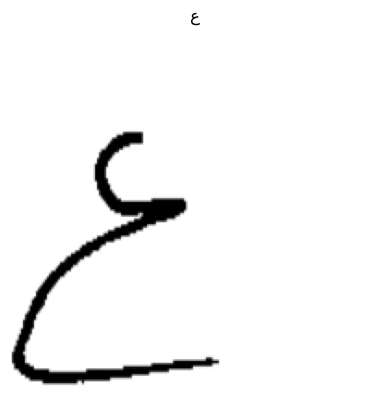

In [68]:
import os
import cv2
import matplotlib.pyplot as plt

# Paths to the directories containing the images and the direct text file containing the label
images_folder = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\alphabets\ain_regular"
label_file = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\alphabet_labels\ain_regular.txt"

# Function to read an image and its corresponding label
def read_image_and_label(folder_path, label_file):
    # Read image
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])  # Assuming each folder contains only one image
    image = cv2.imread(image_path)
    
    # Resize image to a smaller size
    image = cv2.resize(image, (200, 200))  # Adjust the size as needed
    
    # Read label from the direct text file
    with open(label_file, 'r', encoding='utf-8') as file:
        label = file.read().strip()
    
    return image, label

# Read image and label from the specified folder
image, label = read_image_and_label(images_folder, label_file)

# Plot the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
plt.title(label)
plt.axis('off')
plt.show()


# Dataset Filtration: Removing Noisy or Unclear Data
### After performing thresholding to enhance the contrast between text and background, we observed that some images turned completely black, indicating that they may contain noisy or unclear data. To ensure the quality of our dataset, we decided to filter out these images before proceeding with further processing steps. By removing these noisy or unclear images, we aim to improve the overall quality and reliability of our dataset, thus enhancing the performance of subsequent tasks such as optical character recognition (OCR) or computer vision.

In [33]:
import cv2
import os

def enhance_white_color(image_path, threshold_value=90):
    # Load the grayscale image
    grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Invert the colors
    inverted_image = cv2.bitwise_not(grayscale_image)

    # Apply a threshold to enhance the white color
    _, enhanced_image = cv2.threshold(inverted_image, threshold_value, 255, cv2.THRESH_BINARY)

    return enhanced_image

In [34]:
def process_images_in_folders(input_folder):
    # Loop through each alphabet folder
    for alphabet_folder in os.listdir(input_folder):
        print("Processing images in folder:", alphabet_folder)
        alphabet_dir = os.path.join(input_folder, alphabet_folder)

        # Get a list of all image files in the folder
        image_files = [f for f in os.listdir(alphabet_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Process each image in the folder
        for image_file in image_files:
            image_path = os.path.join(alphabet_dir, image_file)

            # Process the image
            enhanced_image = enhance_white_color(image_path)

            # Save the processed image (overwrite the existing image)
            cv2.imwrite(image_path, enhanced_image)


In [28]:
if __name__ == "__main__":
    # Specify the path to the folder containing alphabet folders
    input_folder = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\alphabets"

    # Process images in each alphabet folder
    process_images_in_folders(input_folder)

Processing images in folder: ain_begin
Processing images in folder: ain_end
Processing images in folder: ain_middle
Processing images in folder: ain_regular
Processing images in folder: alif_end
Processing images in folder: alif_hamza
Processing images in folder: alif_regular
Processing images in folder: beh_begin
Processing images in folder: beh_end
Processing images in folder: beh_middle
Processing images in folder: beh_regular
Processing images in folder: dal_end
Processing images in folder: dal_regular
Processing images in folder: feh_begin
Processing images in folder: feh_end
Processing images in folder: feh_middle
Processing images in folder: feh_regular
Processing images in folder: heh_begin
Processing images in folder: heh_end
Processing images in folder: heh_middle
Processing images in folder: heh_regular
Processing images in folder: jeem_begin
Processing images in folder: jeem_end
Processing images in folder: jeem_middle
Processing images in folder: jeem_regular
Processing im

# plot the final preprocessed Alphabets

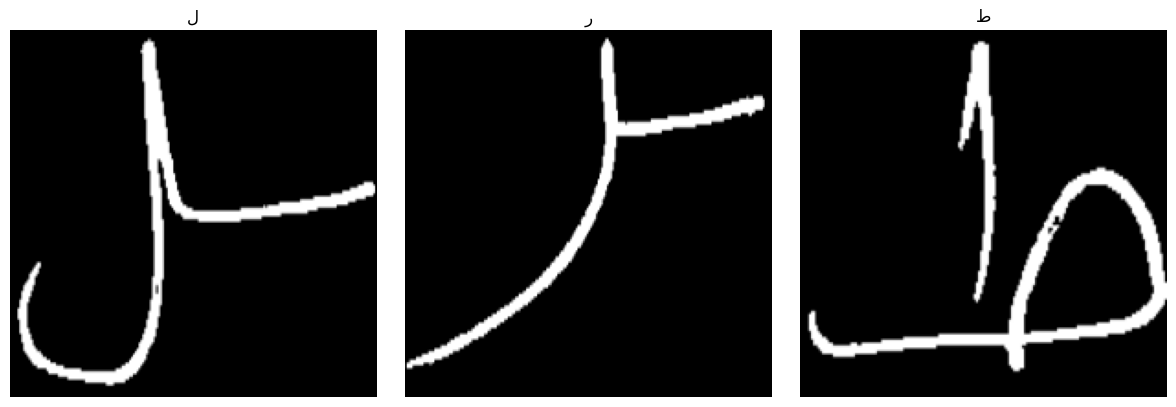

In [54]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Paths to the directories containing the images and text files
images_folder = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\alphabets"
labels_folder = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\alphabet_labels"

# Function to read an image and its corresponding label
def read_image_and_label(folder_path, label_file):
    # Read image
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])  # Assuming each folder contains only one image
    image = cv2.imread(image_path)
    
    # Resize image to a smaller size
    image = cv2.resize(image, (200, 200))  # Adjust the size as needed
    
    # Read label from text file
    label_path = os.path.join(labels_folder, label_file)
    with open(label_path, 'r', encoding='utf-8') as file:
        label = file.read().strip()
    
    return image, label

# Create a figure for the grid of images
plt.figure(figsize=(12, 4))

# Select three random folders
random_folders = random.sample(os.listdir(images_folder), 3)

# Iterate over the random folders and plot images
for i, folder_name in enumerate(random_folders):
    # Read image and label
    image_folder = os.path.join(images_folder, folder_name)
    label_file = folder_name + '.txt'
    image, label = read_image_and_label(image_folder, label_file)
    
    # Plot image
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
    plt.title(label)
    plt.axis('off')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the grid of images
plt.show()


## The code processes word images from a dataset, organizing them into individual folders for each user. It iterates through user directories, reads images, and crops them based on predefined positions for each word. Cropped word images are then saved in the respective user's output folder. The script adjusts for variations in page layout to ensure accurate cropping.

In [3]:
import cv2
import os
from os import path


In [4]:
input_dir_name = path.join(r"C:\Users\Rawan\Desktop\term 8\deep learning\raw_dataset")
output_dir_name_3 = path.join(r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\words")

In [5]:
def getWordName(page, column):
    if (page==1):
        if (column==0): return "azan"
        if (column==1): return "sakhar"
        if (column==2): return "mustadhafeen"
        if (column==3): return "abjadiyah"
        if (column==4): return "fasayakfeekahum"
    if (page==2):    
        if (column==0): return "ghazaal"
        if (column==1): return "ghaleez"
        if (column==2): return "qashtah"
        if (column==3): return "shateerah"
        if (column==4): return "mehras"

In [6]:
# For each user process the images containig the letters
for userid in range(1,83):
    username="user" + format(userid,'03d')
    print(username)   
    output_dirName = os.path.join(output_dir_name_3, username)
    if (not os.path.exists(output_dirName)):
        os.makedirs(output_dirName)
    input_dirName = os.path.join(input_dir_name, username, "words")
    #width = 390
    #x_increment = 20
    height = 216
    y_increrment = 20
    page = 0
    # Process all the user files
    for file in os.listdir(input_dirName):
        print(file)
        image=cv2.imread(os.path.join(input_dirName, file))
        page = page + 1
        #if (page == 2): break
        index = 0
        start_x = 215
        end_x = 605
        # Process each column
        for column in range(5):
            start_y = 680
            # Due to character size, some pages have higher initial height
            if (userid == 2): start_y = 665
            if (userid == 9): start_y = 690
            if (userid == 10 or userid == 11 or userid == 13): start_y = 670
            #print("(%d,%d,%d,%d)"%(start_x, start_y, end_x, start_y+height))
            word_name = getWordName(page, column)
            # Process each row within a column
            for row in range(10):
                #print("(%d,%d,%d,%d)"%(start_x, start_y, end_x, start_y+height))
                cropped_image = image[start_y:start_y+height, start_x:end_x]
                index = index + 1
                filename = "%s_%s.png"%(word_name, format(index,'03d'))
                #cv2.imshow("cropped", cropped_image)
                cv2.imwrite(os.path.join(output_dirName, filename), cropped_image)
                start_y = start_y + height + y_increrment
            # Columns have different widths :(
            if (column == 0): start_x= 625; end_x = 1005
            if (column == 1): start_x= 1030; end_x = 1455
            if (column == 2): start_x= 1490; end_x = 1890
            if (column == 3): start_x= 1915; end_x = 2330



user001
1081_050.jpg
1081_051.jpg
user002
1055_014.jpg
1055_015.jpg
user003
1081_014.jpg
1081_015.jpg
user004
1080_050.jpg
1080_051.jpg
user005
1080_032.jpg
1080_033.jpg
user006
1080_014.jpg
1080_015.jpg
user007
1085_050.jpg
1085_051.jpg
user008
1085_068.jpg
1085_069.jpg
user009
1085_032.jpg
1085_033.jpg
user010
1086_050.jpg
1086_051.jpg
user011
1086_014.jpg
1086_015.jpg
user012
1085_014.jpg
1085_015.jpg
user013
1070_050.jpg
1070_051.jpg
user014
1070_032.jpg
1070_033.jpg
user015
1070_014.jpg
1070_015.jpg
user016
1068_050.jpg
1068_051.jpg
user017
1107_050.jpg
1107_051.jpg
user018
1068_014.jpg
1068_015.jpg
user019
1049_014.jpg
1049_015.jpg
user020
1050_014.jpg
1050_015.jpg
user021
1051_014.jpg
1051_015.jpg
user022
1052_014.jpg
1052_015.jpg
user023
1053_014.jpg
1053_015.jpg
user024
1048_014.jpg
1048_015.jpg
user025
1104_014.jpg
1104_015.jpg
user026
1102_050.jpg
1102_051.jpg
user027
1102_014.jpg
1102_015.jpg
user028
1103_050.jpg
1103_051.jpg
user029
1103_032.jpg
1103_033.jpg
user030
1102_0

## The following code  organizes a dataset of word images by user and word, preprocesses the images for optical character recognition (OCR), and displays the preprocessed images with their corresponding labels.

In [ ]:
import os
import shutil

# Path to the directory containing user folders
user_folders_path = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\words"

# Path to the directory where you want to store the organized folders
output_folder_path = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\preprocessed_words"

# Create output folder if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)

# Loop through each user folder
for user_folder_name in os.listdir(user_folders_path):
    user_folder_path = os.path.join(user_folders_path, user_folder_name)

    # Loop through each image in the user folder
    for image_name in os.listdir(user_folder_path):
        # Extract the word between underscores
        split_name = image_name.split('_')
        if len(split_name) >= 2:
            word = split_name[1]

            # Create a folder for the word if it doesn't exist
            word_folder_path = os.path.join(output_folder_path, word)
            os.makedirs(word_folder_path, exist_ok=True)

            # Move the image to the word folder
            image_path = os.path.join(user_folder_path, image_name)
            shutil.copy(image_path, word_folder_path)


In [39]:
import os
import pandas as pd

# Path to the directory containing the text files
text_files_path = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\words_labels"

# Path to the directory containing the folders with images
folders_path = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\preprocessed_words"

In [24]:


# Create empty lists to store the image paths and corresponding text
image_paths = []
texts = []

# Iterate over the text files
for text_filename in os.listdir(text_files_path):
    if text_filename.endswith('.txt'):
        # Read the text file content (word)
        with open(os.path.join(text_files_path, text_filename), 'r', encoding='utf-8') as file:
            text = file.read().strip()

        # Get the folder name (which is also the word)
        folder_name = os.path.splitext(text_filename)[0]

        # Iterate over the images in the corresponding folder
        folder_path = os.path.join(folders_path, folder_name)
        for image_filename in os.listdir(folder_path):
            if image_filename.endswith('.jpg') or image_filename.endswith('.png'):
                image_path = os.path.join(folder_path, image_filename)
                image_paths.append(image_path)
                texts.append(text)

# Create a DataFrame to store the image paths and corresponding text
data = pd.DataFrame({'image_path': image_paths, 'text': texts})

# Display the DataFrame
print(data)


                                             image_path      text
0     C:\Users\Rawan\Desktop\term 8\deep learning\fi...  الابجدية
1     C:\Users\Rawan\Desktop\term 8\deep learning\fi...  الابجدية
2     C:\Users\Rawan\Desktop\term 8\deep learning\fi...  الابجدية
3     C:\Users\Rawan\Desktop\term 8\deep learning\fi...  الابجدية
4     C:\Users\Rawan\Desktop\term 8\deep learning\fi...  الابجدية
...                                                 ...       ...
8139  C:\Users\Rawan\Desktop\term 8\deep learning\fi...     شطيرة
8140  C:\Users\Rawan\Desktop\term 8\deep learning\fi...     شطيرة
8141  C:\Users\Rawan\Desktop\term 8\deep learning\fi...     شطيرة
8142  C:\Users\Rawan\Desktop\term 8\deep learning\fi...     شطيرة
8143  C:\Users\Rawan\Desktop\term 8\deep learning\fi...     شطيرة

[8144 rows x 2 columns]


In [28]:
import os
import cv2
import numpy as np


# Create a list to store the preprocessed images and corresponding labels
preprocessed_images = []
labels = []

# Iterate over the folders
for folder_name in os.listdir(folders_path):
    folder_path = os.path.join(folders_path, folder_name)

    # Skip if not a directory
    if not os.path.isdir(folder_path):
        continue

    # Find the text file in the labels folder
    text_file_path = os.path.join(text_files_path, folder_name + '.txt')
    if not os.path.exists(text_file_path):
        continue

    # Read the label (word) from the text file
    with open(text_file_path, 'r', encoding='utf-8') as file:
        label = file.read().strip()

    # Iterate over the images in the folder
    for image_filename in os.listdir(folder_path):
        if image_filename.endswith('.jpg') or image_filename.endswith('.png'):
            image_path = os.path.join(folder_path, image_filename)

            # Read the image
            image = cv2.imread(image_path)

            # Convert the image to grayscale
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Apply threshold to make the background black and text white
            _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

            # Resize the image to a fixed size (e.g., 64x64)
            resized_image = cv2.resize(gray_image, (64, 64))

            # Normalize the image
            normalized_image = resized_image / 255.0  # Scale pixel values to [0, 1]

            # Append the preprocessed image and label to the lists
            preprocessed_images.append(normalized_image)
            labels.append(label)

# Convert the lists to NumPy arrays
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

# Print the shape of the preprocessed images and labels
print("Preprocessed Images Shape:", preprocessed_images.shape)
print("Labels Shape:", labels.shape)


Preprocessed Images Shape: (8144, 64, 64)
Labels Shape: (8144,)


In [ ]:
import matplotlib.pyplot as plt

# Display each image along with its corresponding text
for i in range(len(preprocessed_images)):
    plt.figure()
    plt.imshow(preprocessed_images[i], cmap='gray')
    plt.title(labels[i][::-1])  # Reverse the text before displaying
    plt.axis('off')
    plt.show()

In [38]:
if __name__ == "__main__":

    # Process images in each alphabet folder
    process_images_in_folders(folders_path)

Processing images in folder: abjadiyah
Processing images in folder: azan
Processing images in folder: fasayakfeekahum
Processing images in folder: ghaleez
Processing images in folder: ghazaal
Processing images in folder: mehras
Processing images in folder: mustadhafeen
Processing images in folder: qashtah
Processing images in folder: sakhar
Processing images in folder: shateerah


# KHATT Dataset

In [40]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [41]:
# Set the paths to the folders containing the images and corresponding text files
image_folder = r"C:\Users\Rawan\Downloads\Dataset\KHATT Images"
text_folder = r"C:\Users\Rawan\Downloads\Dataset\KHATT labels"

# Create empty lists to store the image paths and corresponding text
image_paths = []
texts = []

# Collect image paths and corresponding text
for image_filename in os.listdir(image_folder):
    if image_filename.endswith('.jpg') or image_filename.endswith('.png'):
        image_path = os.path.join(image_folder, image_filename)
        image_paths.append(image_path)
        
        text_filename = os.path.splitext(image_filename)[0] + '.txt'
        text_path = os.path.join(text_folder, text_filename)
        
        with open(text_path, 'r', encoding='utf-8') as file:
            text = file.read().strip()
            texts.append(text)

# Create a DataFrame to store the image paths and corresponding text
data = pd.DataFrame({'image_path': image_paths, 'text': texts})

In [42]:
# Shuffle the data
data = shuffle(data)

In [43]:
# Preprocess the images
def preprocess_image(image_path):
    image = cv2.imread(image_path, 0)  # Read the image in grayscale
    image = cv2.resize(image, (64, 64))  # Resize the image to a desired size
    image = image / 255.0  # Normalize the pixel values between 0 and 1
    return image

# Apply image preprocessing to all images
data['image'] = data['image_path'].apply(preprocess_image)

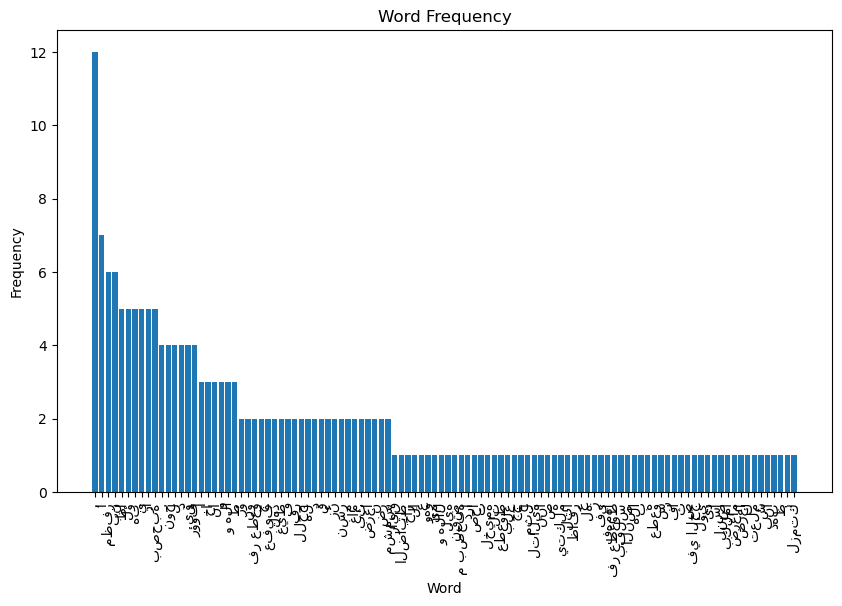

In [44]:
# Perform exploratory data analysis
word_counts = data['text'].value_counts()

# Plot word frequency
plt.figure(figsize=(10, 6))
plt.bar(word_counts.index, word_counts.values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=90)
plt.show()

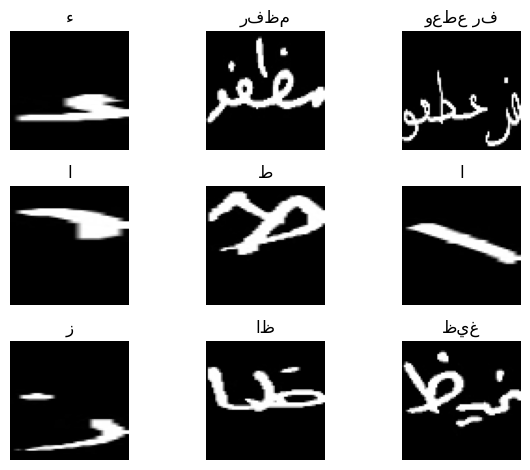

In [45]:
import matplotlib.pyplot as plt

# Number of rows and columns in the grid
num_rows = 3
num_cols = 3

# Counter to keep track of the number of images displayed
counter = 0

# Iterate over the dataset
for index, row in data.iterrows():
    image = row['image']
    text = row['text']
    
    # Reverse the text
    reversed_text = text[::-1]
    
    # Display the image and text
    plt.subplot(num_rows, num_cols, counter + 1)
    plt.imshow(image, cmap='gray')
    plt.title(reversed_text)
    plt.axis('off')
    
    # Increment the counter
    counter += 1
    
    # Break the loop if we have displayed enough images
    if counter >= num_rows * num_cols:
        break

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the grid of images
plt.show()


## normailizing the data

In [96]:
import os
import cv2
import numpy as np

# Function to normalize images in a folder
def normalize_images_in_folder(folder_path):
    # List all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    # Iterate through each image file
    for image_file in image_files:
        # Read the image using OpenCV
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        
        # Check if image is successfully read
        if image is None:
            print(f"Unable to read image: {image_path}")
            continue
        
        # Normalize the image (convert to grayscale and normalize pixel values)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        normalized_image = cv2.normalize(gray_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
        
        # Save the normalized image
        cv2.imwrite(image_path, normalized_image)

# Function to normalize images in all folders within a given path
def normalize_images_in_folders(main_path):
    # List all folders in the main path
    folders = [f for f in os.listdir(main_path) if os.path.isdir(os.path.join(main_path, f))]
    
    # Iterate through each folder and normalize images
    for folder in folders:
        folder_path = os.path.join(main_path, folder)
        normalize_images_in_folder(folder_path)

# Main function
if __name__ == "__main__":
    alphabets_path = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\alphabets"
    normalize_images_in_folders(alphabets_path)
    print("Normalization completed successfully.")


Normalization completed successfully.


In [97]:
preprocessed_words_path = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\preprocessed_words"
normalize_images_in_folders(preprocessed_words_path)
print("Normalization completed successfully.")

Normalization completed successfully.


In [ ]:
preprocessed_words_path = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\preprocessed_words"
normalize_images_in_folders(preprocessed_words_path)
print("Normalization completed successfully.")

## splitting the data into train and test

In [ ]:
import os
from sklearn.model_selection import train_test_split

# Paths to the directories containing the data
preprocessed_words_path = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\preprocessed_words"
khatt_images_path = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\KHATT images"
alphabets_labels_path = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\text_alphabet"
words_labels_path = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\words_labels"
khatt_labels_path = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\KHATT labels"

# Function to load images and labels
def load_data(images_path, labels_path):
    images = []
    labels = []
    for folder_name in os.listdir(images_path):
        folder_path = os.path.join(images_path, folder_name)
        if os.path.isdir(folder_path):
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                images.append(image_path)
                label_file_path = os.path.join(labels_path, folder_name + ".txt")
                with open(label_file_path, 'r', encoding='utf-8') as label_file:
                    label = label_file.read().strip()
                labels.append(label)
    return images, labels

# Load data for alphabets
alphabets_images, alphabets_labels = load_data(alphabets_path, alphabets_labels_path)
# Split the alphabets data
alphabets_train_images, alphabets_test_images, alphabets_train_labels, alphabets_test_labels = train_test_split(alphabets_images, alphabets_labels, test_size=0.2, random_state=42)

# Load data for preprocessed words
preprocessed_words_images, preprocessed_words_labels = load_data(preprocessed_words_path, words_labels_path)
# Split the preprocessed words data
preprocessed_words_train_images, preprocessed_words_test_images, preprocessed_words_train_labels, preprocessed_words_test_labels = train_test_split(preprocessed_words_images, preprocessed_words_labels, test_size=0.2, random_state=42)

# Load data for KHATT images
khatt_images, khatt_labels = load_data(khatt_images_path, khatt_labels_path)
# Split the KHATT data
khatt_train_images, khatt_test_images, khatt_train_labels, khatt_test_labels = train_test_split(khatt_images, khatt_labels, test_size=0.2, random_state=42)

# Merge the splits
train_images = alphabets_train_images + preprocessed_words_train_images + khatt_train_images
train_labels = alphabets_train_labels + preprocessed_words_train_labels + khatt_train_labels
test_images = alphabets_test_images + preprocessed_words_test_images + khatt_test_images
test_labels = alphabets_test_labels + preprocessed_words_test_labels + khatt_test_labels




In [90]:
alphabets_path = r"C:\Users\Rawan\Desktop\term 8\deep learning\final_project_1\alphabets"

# Normalize images in the alphabets_path directory
normalize_images(alphabets_path)